Made by Janusz Feigel, Bhavana Malla, Brinda Rao

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Introduction to Deep Learning/Exercise 1')
os.getcwd()

'/content/drive/MyDrive/Introduction to Deep Learning/Exercise 1'

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

(60000, 28, 28)
(10000, 28, 28)


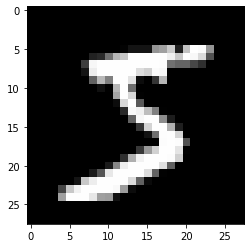

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)


plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)


In [5]:
train_steps = 1000
learning_rate = 0.1

#hidden layer 1 with 512 neurons
W_hidden = tf.Variable(tf.random.uniform(shape=[784, 512], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b_hidden = tf.Variable(tf.random.uniform(shape=[512], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))

#hidden layer 2 with 256 neurons
W_hidden2 = tf.Variable(tf.random.uniform(shape=[512, 256], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b_hidden2 = tf.Variable(tf.random.uniform(shape=[256], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))

#output layer with 10 neurons
W_out = tf.Variable(tf.random.uniform(shape=[256, 10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))
b_out = tf.Variable(tf.random.uniform(shape=[10], minval=-0.1, maxval=0.1, dtype=tf.dtypes.float32))

In [6]:
train_acc = []
test_acc = []
steps = []
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        #hidden layer 1
        hidden1_logits = tf.matmul(img_batch, W_hidden) + b_hidden
        #hidden layer 2
        hidden2_logits = tf.matmul(hidden1_logits, W_hidden2) + b_hidden2
        #output layer
        out_logits = tf.matmul(hidden2_logits, W_out) + b_out
        #output activation and loss
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=out_logits, labels=lbl_batch))
    
    #backpropagation
    grads = tape.gradient(xent, [W_hidden, b_hidden, W_hidden2, b_hidden2, W_out, b_out])
    #gradient descent
    W_hidden.assign_sub(learning_rate * grads[0])
    b_hidden.assign_sub(learning_rate * grads[1])
    W_hidden2.assign_sub(learning_rate * grads[2])
    b_hidden2.assign_sub(learning_rate * grads[3])
    W_out.assign_sub(learning_rate * grads[4])
    b_out.assign_sub(learning_rate * grads[5])

    
    
    if step % 100 == 0:
        preds = tf.argmax(out_logits, axis=1, output_type=tf.int32)
        tr_acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch), tf.float32))
        print("Step {} Loss: {} Accuracy: {}".format(step, xent, tr_acc))
        hidden1_logits = tf.matmul(data.test_data, W_hidden) + b_hidden
        hidden2_logits = tf.matmul(hidden1_logits, W_hidden2) + b_hidden2
        out_logits = tf.matmul(hidden2_logits, W_out) + b_out

        test_preds = tf.argmax(out_logits, axis=1, output_type=tf.int32)
        te_acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels), tf.float32))
        print(te_acc.numpy())
        train_acc.append(tr_acc)
        test_acc.append(te_acc.numpy())
        steps.append(step)
    

Step 0 Loss: 2.570791482925415 Accuracy: 0.1328125
0.1868
Step 100 Loss: 0.3761165142059326 Accuracy: 0.890625
0.8952
Step 200 Loss: 0.49019938707351685 Accuracy: 0.859375
0.9065
Step 300 Loss: 0.2903391718864441 Accuracy: 0.921875
0.908
Step 400 Loss: 0.41081690788269043 Accuracy: 0.8984375
0.9114
Starting new epoch...
Step 500 Loss: 0.3952747881412506 Accuracy: 0.921875
0.9157
Step 600 Loss: 0.24724885821342468 Accuracy: 0.9296875
0.9148
Step 700 Loss: 0.23941275477409363 Accuracy: 0.953125
0.9172
Step 800 Loss: 0.28432920575141907 Accuracy: 0.921875
0.9199
Step 900 Loss: 0.1934635192155838 Accuracy: 0.9453125
0.9197
Starting new epoch...


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

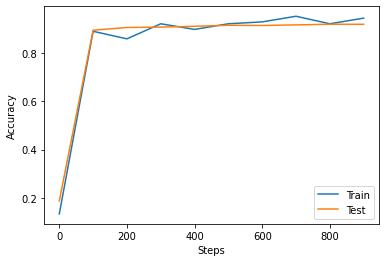

In [14]:
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.plot(steps, train_acc)
plt.plot(steps, test_acc)
plt.legend(["Train", "Test"])

#plt.show()

Initializing the weights and biases with zero would lead to a small gradient, which would be the same for all neurons.
Larger batch sizes converge slower to an accuracy of 0.9.
Small changes of the learning rate have the same results as as a learning rate of 0.1. Big changes of the learning rate have a low accuracy.
More than 100 train steps result in a loop of increases and decreases of the accuracy, between 0.85 and 0.95.
2 hidden layers have the same result as 1 hidden layer. Changing the numbers of neurons of the layers had almost the same result.
The definition of the variables of each layer is redundant, complete layers from shapes would make that simpler.